In [61]:
from pandas import read_csv
from pandas.tools.plotting import scatter_matrix
from matplotlib import pyplot
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.decomposition import PCA

from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets



In [8]:
# import iris data to play with
iris = datasets.load_iris()
X = iris.data # we only take the first two features.
y = iris.target
names_x = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width']
names_y='class'

In [44]:
dataset=pd.DataFrame(data=X,columns=names_x)
dataset['class']=pd.DataFrame(data=y)

In [46]:
dataset.describe()

,sepal-length,sepal-width,petal-length,petal-width,class
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667,1.000000
std,0.828066,0.433594,1.764420,0.763161,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [47]:
dataset.groupby('class').size()

class
0    50
1    50
2    50
dtype: int64

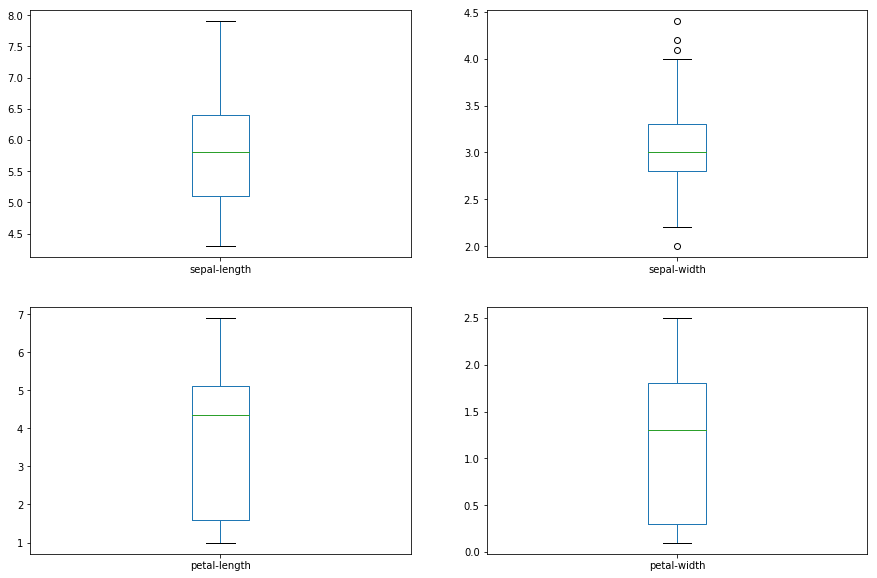

In [50]:
dataset.iloc[:,:4].plot(kind='box', subplots=True, layout=(2,2), figsize=(15,10),sharex=False, sharey=False)
pyplot.show()

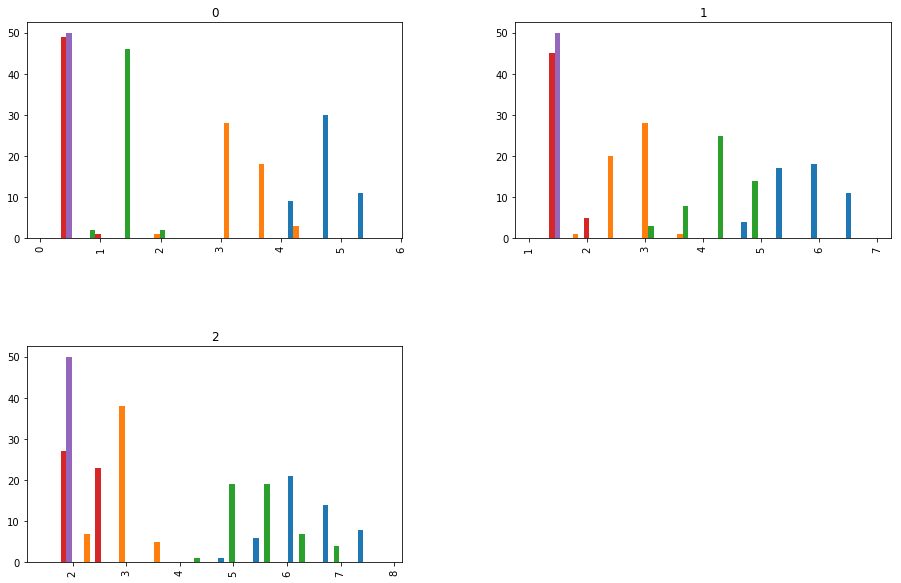

In [74]:
dataset.hist(figsize=(15,10),by='class')
pyplot.show()

C:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  """Entry point for launching an IPython kernel.


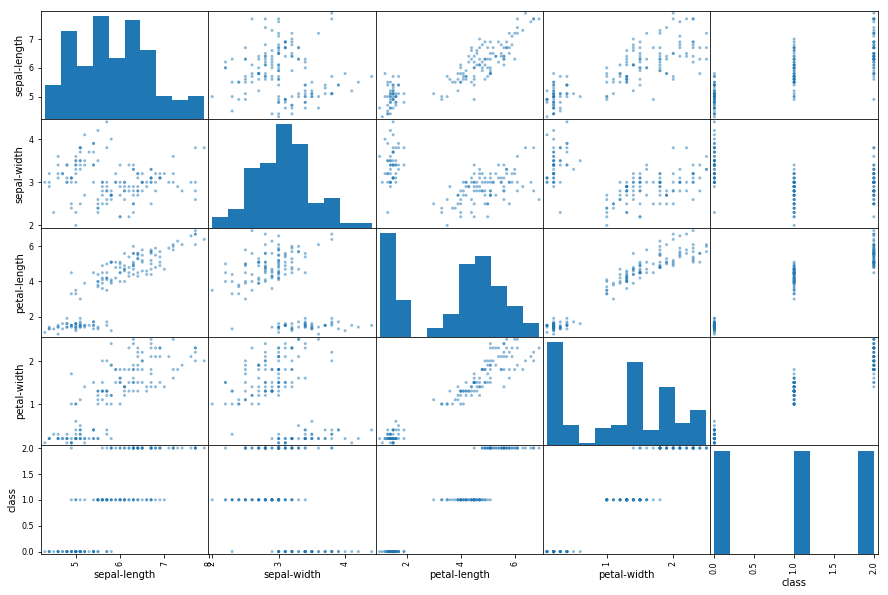

In [53]:
scatter_matrix(dataset,figsize=(15,10))
pyplot.show()

In [55]:
validation_size = 0.20
seed = 7
X_train, X_test, Y_train, Y_test = train_test_split(X, y,test_size=validation_size, random_state=seed)

In [73]:
# Spot-Check Algorithms
models = []
#linear models
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))

#non-linear models
models.append(('KNN', KNeighborsClassifier(n_neighbors=10,leaf_size=30)))
models.append(('CART', DecisionTreeClassifier(max_depth=3,min_samples_split=3)))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=10, random_state=7)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.966667 (0.040825)
LDA: 0.975000 (0.038188)
KNN: 0.983333 (0.033333)
CART: 0.966667 (0.040825)
NB: 0.975000 (0.053359)
SVM: 0.991667 (0.025000)


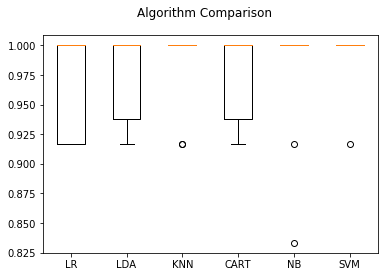

In [71]:
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

In [72]:
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)
predictions = knn.predict(X_test)

print(accuracy_score(Y_test, predictions))
print(confusion_matrix(Y_test, predictions))
print(classification_report(Y_test, predictions))

0.9
[[ 7  0  0]
 [ 0 11  1]
 [ 0  2  9]]
             precision    recall  f1-score   support

          0       1.00      1.00      1.00         7
          1       0.85      0.92      0.88        12
          2       0.90      0.82      0.86        11

avg / total       0.90      0.90      0.90        30

